<a href="https://colab.research.google.com/github/ShimaMETU/CNG_562_HW_2/blob/master/Mohaghegh_otto_group_product_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Otto Group Product Classification Challenge***

# *Data fields*

id - an anonymous id unique to a product

feat_1, feat_2, ..., feat_93 - the various features of a product

target - the class of a product

In [0]:
%reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# ***First Step: Load Dataset***

***Mount the Google Drive to Google Colab***

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
Otto_Group_Product_Classification_Challenge= pd.read_csv('/content/drive/My Drive/otto-group-product-classification-challenge/train.csv')
Otto_Group_Product_Classification_Challenge.head(5)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1


# ***Data prepration***

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

temp = Otto_Group_Product_Classification_Challenge.to_numpy()
X = temp.T[1:-2].T
y = temp.T[-1].T

for i in range(len(y)):
  y[i] = float(y[i][-1])
y = np.array(y).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
y_on_hot = to_categorical(y_train-1)
y_test_one_hot = to_categorical(y_test-1)
x_train.shape ,x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape ,y_on_hot.shape ,y_test_one_hot.shape

Using TensorFlow backend.


((49502, 92),
 (49502, 92),
 (12376, 92),
 (49502, 1),
 (12376, 1),
 (49502, 9),
 (12376, 9))

# ***Training a Multi-layer Perceptron (MLP)***

In [0]:
import keras
from keras import Sequential
from keras import layers
from keras import optimizers

MLP_model = Sequential()
MLP_model.add(layers.Dense(60,activation="tanh",input_shape=(92,)))
MLP_model.add(layers.Dense(35,activation="tanh"))
MLP_model.add(layers.Dense(9,activation="softmax"))
MLP_model.compile(loss="mean_squared_error",optimizer=optimizers.Adam(),metrics=['acc'])
MLP_history = MLP_model.fit(x_train, y_on_hot, batch_size=512, epochs=150, validation_data=(x_test, y_test_one_hot))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 49502 samples, validate on 12376 samples
Epoch 1/150
49502/49502 [==============================] - 3s 61us/step - loss: 0.0560 - acc: 0.6280 - val_loss: 0.0419 - val_acc: 0.7239
Epoch 2/150
49502/49502 [==============================] - 1s 11us/step - loss: 0.0386 - acc: 0.7475 - val_loss: 0.0379 - val_acc: 0.7520
Epoch 3/150
49502/49502 [==============================] - 1s 10us/step - loss: 0.0357 - acc: 0.7664 - val_loss: 0.0361 - val_acc: 0.7637
Epoch 4/150
49502/49502 [==============================] - 1s 10us/step - loss: 0.0341 - acc: 0.7778 - val_loss: 0.0350 - val_acc: 0.7698
Epoch 5/150
49502/49502 [==============================] - 1s 10us/step - loss: 0.0330 - acc: 0.7857 - val_loss: 0.0343 - val_acc: 0.7737
Epoch 6/150
49502/49502 [==============================] - 1s 11us/step - loss: 0.0321 - acc: 0.7928 - val_loss: 0.0339 - val_acc: 0.7737
Ep

# ***Classification Report for MLP***

In [0]:
from sklearn.metrics import classification_report
from sklearn import metrics
y_pred_mlp = to_categorical(MLP_model.predict_classes(x_test))
report_classification = metrics.classification_report(y_test_one_hot,y_pred_mlp)
print("report_classification : ")
print(report_classification)

report_classification : 
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       391
           1       0.73      0.82      0.77      3236
           2       0.56      0.49      0.52      1664
           3       0.62      0.49      0.55       550
           4       0.94      0.96      0.95       508
           5       0.93      0.93      0.93      2747
           6       0.67      0.61      0.64       556
           7       0.90      0.89      0.89      1701
           8       0.83      0.85      0.84      1023

   micro avg       0.78      0.78      0.78     12376
   macro avg       0.75      0.73      0.74     12376
weighted avg       0.78      0.78      0.78     12376
 samples avg       0.78      0.78      0.78     12376



# ***Training and validation accuracy of MLP***

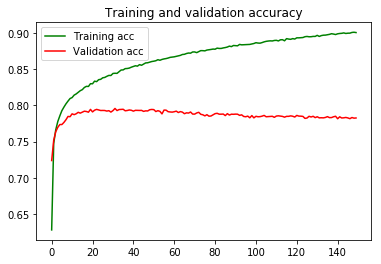

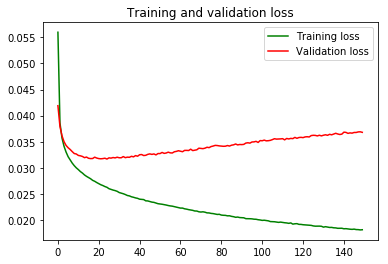

In [0]:
import matplotlib.pyplot as plt

acc = MLP_history.history['acc']
val_acc = MLP_history.history['val_acc']
loss = MLP_history.history['loss']
val_loss = MLP_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# ***ROC for MLP***

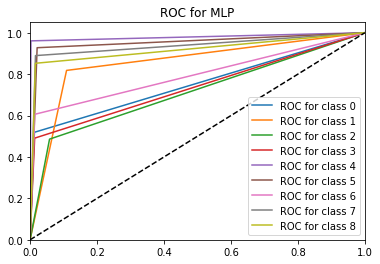

In [0]:
from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_mlp[:, i])

for i in range(9):
    plt.plot(fpr[i], tpr[i],
             label='ROC for class {0}'.format(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC for MLP")
plt.show()

# ***Training with K-Nearest Neighbors***

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25 )
knn.fit(x_train, y_train.astype(np.int64))
y_pred_knn = knn.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# ***Classification Report for KNN***

In [0]:
report_classification = metrics.classification_report(y_test_one_hot,to_categorical(y_pred_knn-1))
print("report_classification : ")
print(report_classification)

report_classification : 
              precision    recall  f1-score   support

           0       0.59      0.44      0.51       391
           1       0.66      0.87      0.75      3236
           2       0.56      0.44      0.49      1664
           3       0.80      0.17      0.28       550
           4       0.91      0.96      0.93       508
           5       0.94      0.92      0.93      2747
           6       0.71      0.55      0.62       556
           7       0.89      0.88      0.89      1701
           8       0.80      0.87      0.83      1023

   micro avg       0.77      0.77      0.77     12376
   macro avg       0.76      0.68      0.69     12376
weighted avg       0.77      0.77      0.75     12376
 samples avg       0.77      0.77      0.77     12376



# ***ROC for KNN***

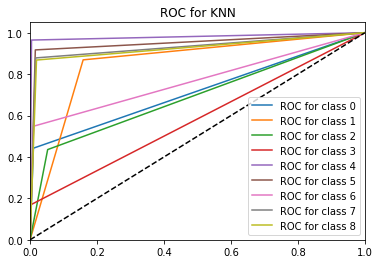

In [0]:
fpr = dict()
tpr = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], to_categorical(y_pred_knn-1)[:, i])

for i in range(9):
    plt.plot(fpr[i], tpr[i],
             label='ROC for class {0}'.format(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC for KNN")
plt.show()

# ***Training with Support Vector Machines (SVM)***

In [0]:
y_train_svm = y_train.astype(np.int64)
from sklearn import svm
clf_svm = svm.SVC(gamma='auto')
clf_svm.fit(x_train,y_train_svm)
y_pred_svm = clf_svm.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# ***Classification Report for SVM***

In [0]:
y_pred_svm = to_categorical(y_pred_svm-1)
report_classification = metrics.classification_report(y_test_one_hot,y_pred_svm)
print("report_classification for SVM : ")
print(report_classification)

report_classification for SVM : 
              precision    recall  f1-score   support

           0       0.71      0.45      0.55       391
           1       0.70      0.89      0.78      3236
           2       0.63      0.42      0.50      1664
           3       0.90      0.35      0.50       550
           4       0.96      0.96      0.96       508
           5       0.94      0.92      0.93      2747
           6       0.70      0.54      0.61       556
           7       0.77      0.93      0.84      1701
           8       0.84      0.83      0.83      1023

   micro avg       0.78      0.78      0.78     12376
   macro avg       0.79      0.70      0.72     12376
weighted avg       0.78      0.78      0.77     12376
 samples avg       0.78      0.78      0.78     12376



# ***ROC for SVM***

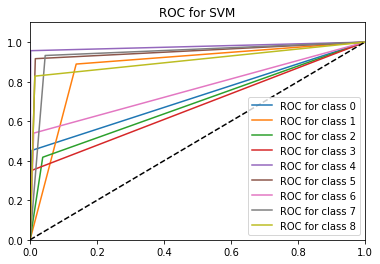

In [0]:
fpr = dict()
tpr = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_svm[:, i])

for i in range(9):
    plt.plot(fpr[i], tpr[i],
             label='ROC for class {0}'.format(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.title("ROC for SVM")
plt.show()

# ***Training with Random Forest***

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(x_train, y_on_hot)
y_pred_random_forest = clf_random_forest.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# ***Classification Report for Random Forest***

In [0]:
report_classification = metrics.classification_report(y_test_one_hot,y_pred_random_forest)
print("report_classification for Random Forest: ")
print(report_classification)

report_classification for Random Forest: 
              precision    recall  f1-score   support

           0       0.91      0.19      0.31       391
           1       0.79      0.69      0.74      3236
           2       0.68      0.31      0.43      1664
           3       0.87      0.23      0.36       550
           4       0.98      0.91      0.94       508
           5       0.97      0.87      0.92      2747
           6       0.88      0.26      0.40       556
           7       0.94      0.78      0.85      1701
           8       0.91      0.69      0.79      1023

   micro avg       0.88      0.64      0.74     12376
   macro avg       0.88      0.55      0.64     12376
weighted avg       0.87      0.64      0.72     12376
 samples avg       0.64      0.64      0.64     12376



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# ***ROC for Random Forest***

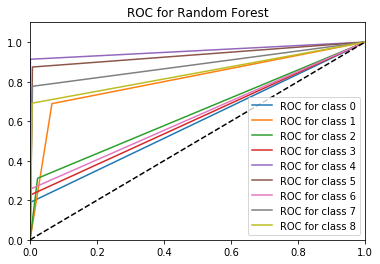

In [0]:
fpr = dict()
tpr = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_random_forest[:, i])

for i in range(9):
    plt.plot(fpr[i], tpr[i],
             label='ROC for class {0}'.format(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.title("ROC for Random Forest")
plt.show()

# ***Training with XGBoost Method***

In [0]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob")
xgb_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# ***Classification Report for XGBoost***

In [0]:
y_pred_xgb = xgb_model.predict(x_test)
y_pred_xgb = to_categorical(y_pred_xgb-1)
report_classification = metrics.classification_report(y_test_one_hot,y_pred_xgb)
print("report_classification for XGBoost : ")
print(report_classification)

report_classification for XGBoost : 
              precision    recall  f1-score   support

           0       0.64      0.31      0.42       391
           1       0.65      0.88      0.75      3236
           2       0.56      0.35      0.43      1664
           3       0.82      0.31      0.45       550
           4       0.94      0.95      0.95       508
           5       0.92      0.93      0.92      2747
           6       0.71      0.56      0.63       556
           7       0.87      0.91      0.89      1701
           8       0.82      0.84      0.83      1023

   micro avg       0.77      0.77      0.77     12376
   macro avg       0.77      0.67      0.70     12376
weighted avg       0.76      0.77      0.75     12376
 samples avg       0.77      0.77      0.77     12376



# ***ROC for XGBoost***

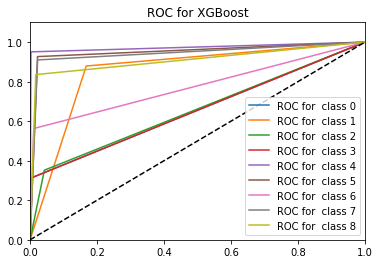

In [0]:
fpr = dict()
tpr = dict()
for i in range(9):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_xgb[:, i])

for i in range(9):
    plt.plot(fpr[i], tpr[i],
             label='ROC for  class {0}'.format(i))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.legend(loc="lower right")
plt.title("ROC for XGBoost")
plt.show()

# ***Comparison***

precision factor --> Random Forest had the best result.

Recall and f1_score -->SVM & MLP had better results 

Also via ROC curves we can find out which class has been predicted better